In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
# !pip3 install --quiet tensorflow==1.15
# !pip3 install --quiet "tensorflow_hub>=0.6.0"
# !pip3 install --quiet tensorflow_text==1.15
!pip3 install --quiet xgboost
!pip3 install --quiet catboost

from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import confusion_matrix
# import tensorflow as tf
# import tensorflow_hub as hub

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import catboost as cbt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

     |████████████████████████████████| 67.3MB 43kB/s 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder-large/3")
tf.logging.set_verbosity(tf.logging.ERROR)

session = tf.Session()
session.run([tf.global_variables_initializer(), tf.tables_initializer()])

[None, None]

In [ ]:
train_data = pd.read_csv('/gdrive/My Drive/Body/data_2k.csv', encoding="unicode_escape")
train_data.head(), len(train_data)

(                                                text  label
 0  Its Holy everyone up is quiet palmdale bbw ove...      0
 1  May you all have a peaceful tiredbuthappy deca...      0
 2  Costco New York is my a Tastes great and paire...      0
 3  each time you shoot a zero you have to give me...      0
 4  Facebook strikes again â I liked a few pages...      1, 2159)

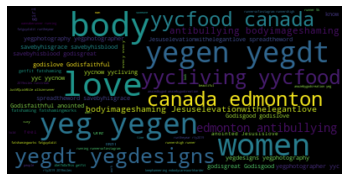

In [ ]:
import pandas as pd
from wordcloud import WordCloud
df = pd.read_csv('/gdrive/My Drive/Body/data_2k.csv', encoding="unicode_escape")
your_list = []

for text, label in zip(df['text']. values, df['label'].values):
    if label == '0' or label == 0:
        your_list.append(text)
your_list = '\t'.join(your_list)
wordcloud = WordCloud().generate(your_list)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(your_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
train, test = train_test_split(train_data, test_size=0.15, random_state=5)
train, eval = train_test_split(train, test_size=0.15, random_state=42)

In [ ]:
# print(len(X))

#TfIdf
# vectorizer = TfidfVectorizer()
# X_test = vectorizer.fit_transform(X).toarray()

# USE
X_train = np.array(session.run(embed(train['text'].values)))
print(X_train.shape)

X_test = np.array(session.run(embed(test['text'].values)))
print(X_test.shape)
# Y_test = train_data_2k['label'].values
#Doc2vec
# X = np.array(doc2vec_feat(X))

# print(Y_test, y)

(1835, 512)
(324, 512)


In [ ]:
!pip install "tensorflow>=1.7.0"
!pip install tensorflow-hub

In [ ]:
%tensorflow_version 1.x
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2")

In [ ]:
def elmo_vectors(x):
  embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    temp = sess.run(tf.reduce_mean(embeddings,1))
    del embeddings
    return temp

In [ ]:
X_train = []
for count in range(15):
  X_train.append(elmo_vectors(list(train['text'].values)[count*100:(count+1)*100]))
X_train.append(elmo_vectors(list(train['text'].values)[1500:]))
X_train = np.array(X_train)
X_train.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


(16,)

In [ ]:
X_train = np.concatenate(X_train, axis=0)
print(X_train.shape)

(1559, 1024)


In [ ]:
len(test), len(eval)

(324, 276)

In [ ]:
X_test = []
for count in range(3):
  X_test.append(elmo_vectors(list(test['text'].values)[count*100:(count+1)*100]))
X_test.append(elmo_vectors(list(test['text'].values)[300:]))
X_test = np.array(X_test)
X_test.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


(4,)

In [ ]:
X_test = np.concatenate(X_test, axis=0)
print(X_test.shape)

(324, 1024)


In [ ]:
 X_eval = []
 for count in range(2):
   X_eval.append(elmo_vectors(list(eval['text'].values)[count*100:(count+1)*100]))
X_eval.append(elmo_vectors(list(eval['text'].values)[200:]))
X_eval = np.array(X_eval)
X_eval.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


(3,)

In [ ]:
X_eval = np.concatenate(X_eval, axis=0)
print(X_eval.shape)

(276, 1024)


In [ ]:
!pip3 install -U sentence-transformers
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('bert-base-uncased')

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 2.1MB 8.3MB/s 
     |████████████████████████████████| 1.2MB 24.8MB/s 
     |████████████████████████████████| 901kB 36.3MB/s 
     |████████████████████████████████| 3.3MB 33.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.0-cp37-none-any.whl size=119615 sha256=da669dfacd2cb96345e6d4567e1a65da340edff93f9d6971bf1c0318e08baba5
  Stored in directory: /root/.cache/pip/wheels/84/cb/21/1066bff3027215c760ca14a198f698bca8fccb92e33e2327eb
Successfully built sentence-transformers


Exception when trying to download http://sbert.net/models/bert-base-uncased.zip. Response 404
SentenceTransformer-Model http://sbert.net/models/bert-base-uncased.zip not found. Try to create it from scratch
Try to create Transformer Model bert-base-uncased with mean pooling


In [ ]:
X_train = bert_model.encode(train['text'].values)
print(X_train.shape)

X_test = bert_model.encode(test['text'].values)
print(X_test.shape)

X_eval = bert_model.encode(eval['text'].values)
print(X_eval.shape)

(1559, 768)
(324, 768)
(276, 768)


In [ ]:
# vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2,5))
vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(1,5))
# vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,5))

# vectorizer = TfidfVectorizer(analyzer='word')
X_train = vectorizer.fit_transform(train['text'].values)
print(X_train.shape)

X_test = vectorizer.transform(test['text'].values)
print(X_test.shape)

X_eval = vectorizer.transform(eval['text'].values)
print(X_eval.shape)

(1559, 113657)
(324, 113657)
(276, 113657)


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid)
# grid = LogisticRegression(class_weight='balanced', C=100, max_iter=300)
# grid = LogisticRegression(C=0.1, max_iter=300)
grid = LogisticRegression(C=100, max_iter=300, class_weight="balanced")
grid = grid.fit(X=X_train, y=train['label'].values)

Y_pred = grid.predict(X_eval)
print(classification_report(eval['label'], Y_pred))
print(mcc(eval['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(eval['label'], Y_pred).ravel()
print(tn, fp, fn, tp)


Y_pred = grid.predict(X_test)
print(classification_report(test['label'], Y_pred))
print(mcc(test['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(test['label'], Y_pred).ravel()
(tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       170
           1       0.90      0.88      0.89       106

    accuracy                           0.92       276
   macro avg       0.91      0.91      0.91       276
weighted avg       0.92      0.92      0.92       276

0.8231385909823409
160 10 13 93
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.89      0.89      0.89       108

    accuracy                           0.93       324
   macro avg       0.92      0.92      0.92       324
weighted avg       0.93      0.93      0.93       324

0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(204, 12, 12, 96)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = SVC(probability=True, class_weight='balanced', C=15,kernel='linear')
# grid = SVC(probability=True)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 10]}

# grid = GridSearchCV(model, parameters)
grid = grid.fit(X=X_train, y=train['label'])

Y_pred = grid.predict(X_eval)
print(classification_report(eval['label'], Y_pred))
print(mcc(eval['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(eval['label'], Y_pred).ravel()
print(tn, fp, fn, tp)


Y_pred = grid.predict(X_test)
print(classification_report(test['label'], Y_pred))
print(mcc(test['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(test['label'], Y_pred).ravel()
(tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       170
           1       0.90      0.90      0.90       106

    accuracy                           0.92       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.92      0.92      0.92       276

0.8389172831794971
160 10 11 95
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       216
           1       0.90      0.86      0.88       108

    accuracy                           0.92       324
   macro avg       0.92      0.91      0.91       324
weighted avg       0.92      0.92      0.92       324

0.8248650843717066


(206, 10, 15, 93)

In [ ]:
model = XGBClassifier(class_weight="balanced")
# model = XGBClassifier()
model = model.fit(X=X_train, y=train['label'])

Y_pred = model.predict(X_eval)
print(classification_report(eval['label'], Y_pred))
print(mcc(eval['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(eval['label'], Y_pred).ravel()
print(tn, fp, fn, tp)


Y_pred = model.predict(X_test)
print(classification_report(test['label'], Y_pred))
print(mcc(test['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(test['label'], Y_pred).ravel()
(tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       170
           1       0.92      0.85      0.88       106

    accuracy                           0.91       276
   macro avg       0.91      0.90      0.91       276
weighted avg       0.91      0.91      0.91       276

0.8151312075867251
162 8 16 90
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       216
           1       0.86      0.84      0.85       108

    accuracy                           0.90       324
   macro avg       0.89      0.89      0.89       324
weighted avg       0.90      0.90      0.90       324

0.7768198130736166


(201, 15, 17, 91)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

model = RandomForestClassifier(n_estimators=300, class_weight="balanced")
model = model.fit(X=X_train, y=train['label'])

Y_pred = model.predict(X_eval)
print(classification_report(eval['label'], Y_pred))
print(mcc(eval['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(eval['label'], Y_pred).ravel()
print(tn, fp, fn, tp)


Y_pred = model.predict(X_test)
print(classification_report(test['label'], Y_pred))
print(mcc(test['label'], Y_pred))
tn, fp, fn, tp = confusion_matrix(test['label'], Y_pred).ravel()
(tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       170
           1       0.93      0.75      0.83       106

    accuracy                           0.88       276
   macro avg       0.89      0.85      0.87       276
weighted avg       0.89      0.88      0.88       276

0.7480020818126397
164 6 27 79
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       216
           1       0.86      0.69      0.76       108

    accuracy                           0.86       324
   macro avg       0.86      0.81      0.83       324
weighted avg       0.86      0.86      0.85       324

0.6721809596566367


(204, 12, 34, 74)